### Ejercicio  
Resolver mediante una configuración de un algoritmo genético el problema de los Ocho Consecutivos que distribuye los números 1 
al 8 en las ocho casillas de la figura, con la condición de que no puede haber dos números consecutivos en casillas adyacentes. Se consideran casillas adyacentes aquéllas que comparten un lado.

La siguiente configuración representa una solución al problema:
    
    2 6 8 5 
    7 4 1 3
    
    

In [ ]:
import random

In [ ]:
class ProblemaGeneticoOchoConsecutivos(object):
        def __init__(self,fun_dec,fun_muta , fun_cruza, fun_fitness):
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

In [ ]:
#Funcion auxiliar que trasnforma la lista de numeros, en una matriz 2x4
def lista_a_matriz(cromosoma):
    salida=[]
    
    linea=[]
    for i in range(len(cromosoma)//2):
        linea.append(cromosoma[i])
    salida.append(linea)
    
    linea=[]
    for i in range(len(cromosoma)//2,len(cromosoma)):
        linea.append(cromosoma[i])
    salida.append(linea)
    return salida

In [ ]:
# Como es un problema de permutaciones utilizaremos el PMX para cruzar
def fun_cruzarPMX(cromosoma1, cromosoma2):
    l = len(cromosoma1)
    p1 = random.randint(0,l-1)
    p2 = random.randint(p1,l-1)
    cruzar1 = PMX(cromosoma1,cromosoma2,p1,p2)
    cruzar2 = PMX(cromosoma2,cromosoma1,p1,p2)
    return [cruzar1,cruzar2]

def PMX(cP,cH,p1,p2):
    #Inicializamos la lista para poder acceder a las coordenadas directamente
    salida =[]
    for _ in range(len(cP)):
        salida.append(0)
    
    #Insertamos la parte del CromosomaP
    for i in range(p1,p2+1):
        salida[i]=cP[i]
        
    #Rellenamos el array con el otro Cromosoma
    for i in range(p1,p2+1):
        num = cH[i]
        if not num in salida:
            numP = cP[i]
            index = cH.index(numP)
            while salida[index]!=0:
                numP = cP[index]
                index = cH.index(numP)
            salida[index]=num
            
    #Terminamos de rellenarlo
    for i in range(len(salida)):
        if salida[i]==0:
            salida[i]=cH[i]
            
    return salida

#Vamor a utilizar una funcion de cruze por orden
def fun_cruzarOrden(cromosoma1, cromosoma2):
    l = len(cromosoma1)
    p1 = random.randint(0,l-1)
    p2 = random.randint(p1,l-1)
    cruzar1 = orden(cromosoma1,cromosoma2,p1,p2)
    cruzar2 = orden(cromosoma2,cromosoma1,p1,p2)
    return [cruzar1,cruzar2]

def orden(cP,cH,p1,p2):
    #Inicializamos la lista para poder acceder a las coordenadas directamente
    salida =[]
    for _ in range(len(cP)):
        salida.append(0)
    
    #Insertamos la parte del CromosomaP
    for i in range(p1,p2+1):
        salida[i]=cP[i]
        
    #Insertamos los elementos que faltan el orden que se encuentran en cH empezando por P2
    index=p2+1
    indexcH=p2+1
    while salida[index%len(salida)]==0:
        while cH[indexcH%len(cH)] in salida:
            indexcH+=1
        salida[index%len(salida)]=cH[indexcH%len(cH)]
        index+=1
        
    return salida

#funcion que intercambia un par de elementos del cromosoma
def fun_mutar_par(cromosoma,prob):
    #Elegimos dos puntos del array para intercambiarlos
    l = len(cromosoma)
    p1 = random.randint(0,l-1)
    p2 = random.randint(0,l-1)
    
    #Queremos tener dos puntos distintos
    while p1==p2:
        p2 = random.randint(0,l-1)
    
    #Si la probabilidad sale favorable los intercambiamos
    if prob > random.uniform(0,1):
        aux = cromosoma[p1]
        cromosoma[p1]=cromosoma[p2]
        cromosoma[p2]=aux
    return cromosoma

#funcion que mezcla los elementos entre dos puntos aleatorios
def fun_mutar_scramble(cromosoma,prob):
    #obtenemos dos puntos tal que 0 <= i <= j <= len(cromosoma)
    i=random.randrange(0,len(cromosoma)-1)
    j=random.randrange(i,len(cromosoma))
    
    #si la probabilidad sale favorable mezclamos el fragmento entre i y j
    if prob > random.uniform(0,1):
        segmento=cromosoma[i:j]
        random.shuffle(segmento)
        cromosoma =  cromosoma[:i] + segmento + cromosoma[j:]
        
    return cromosoma

#Funcion que obtendra +1 si un numero tiene otro a su alrededor que no sea consecutivo y -1 si es consecutivo
def fun_fitness_Ocho_Cons(cromosoma):
    aux = lista_a_matriz(cromosoma)
    n=0
    for i in range(len(aux)):
        for j in range(len(aux[i])):
            n+=check(aux,i,j)
    return n

def check(matriz,fila,columna):
    # Obtiene la longitud de las filas y columnas de la matriz
    filas = len(matriz)
    columnas = len(matriz[0])

    # Inicializa el contador de vecinos no consecutivos en 0
    contador = 0

    # Comprueba si el vecino superior es no consecutivo al proporcionado
    if fila > 0:
        if matriz[fila - 1][columna] != matriz[fila][columna] + 1:
            contador += 1
        else:
            contador -=1

    # Comprueba si el vecino inferior es no consecutivo al proporcionado
    if fila < filas - 1:
        if matriz[fila + 1][columna] != matriz[fila][columna] + 1:
            contador += 1
        else:
            contador -= 1

    # Comprueba si el vecino izquierdo es no consecutivo al proporcionado
    if columna > 0:
        if matriz[fila][columna - 1] != matriz[fila][columna] + 1:
            contador += 1
        else:
            contador -= 1

    # Comprueba si el vecino derecho es no consecutivo al proporcionado
    if columna < columnas - 1: 
        if matriz[fila][columna + 1] != matriz[fila][columna] + 1:
            contador += 1
        else:
            contador -= 1

    # Devuelve el contador de vecinos no consecutivos
    return contador

In [ ]:
def poblacion_inicial(size):
    l=[] # población inicial
    for i in range(size): # añadimos a la población size individuos
        #Puesto que no queremos repetidos creamos una lista con todos los elementos y la mezclamos
        x=[1,2,3,4,5,6,7,8]
        random.shuffle(x)
        l.append(x) 
    return l

#Funcion que craza los padres de forma destructiva
def cruza_padres_destructiva(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1])                                                      
        l.append(desc[0]) 
        l.append(desc[1])
    return l

#Funcion que craza los padres de forma NO destructiva, es decir se queda con los dos mejores entre los hijos y los padres
def cruza_padres_NO_destructiva(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):
        padre1=padres[2*i]
        padre2=padres[2*i+1]
        desc = problema_genetico.cruza(padre1,padre2)
        
        lista = [padre1,padre2,desc[0],desc[1]]
        
        mejores=sorted(lista,key=problema_genetico.fitness,reverse=True)
        
        l.append(mejores[0]) 
        l.append(mejores[1])
    return l

def muta_individuos(problema_genetico, poblacion, prob):
    l = []
    for i in poblacion:
        l.append(problema_genetico.muta(i,prob))
    return l

def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
    return seleccionados  

def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos,cruza_padres,prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones


In [ ]:
def algoritmo_genetico(problema_genetico,k,opt,ngen,size,cruzar,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,cruzar,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 

### Probamos que el funcionamiento es correcto con varias configuraciones

In [ ]:
ocho=ProblemaGeneticoOchoConsecutivos(lista_a_matriz,fun_mutar_par,fun_cruzarPMX,fun_fitness_Ocho_Cons)
# Recordamos los parámetros:  fun_dec,fun_muta , fun_cruza, fun_fitness                
salida=algoritmo_genetico(ocho,2,max,5,100,cruza_padres_NO_destructiva,0.7,0.1)
# Recordamos los parámetros: problema_genetico,k,opt,ngen,size,cruzar,prop_cruces,prob_mutar
print(f"Valor Maximo posible=20\nValor obtenido={salida[1]}\nSolucion Obtenida:\n{salida[0][0]}\n{salida[0][1]}")

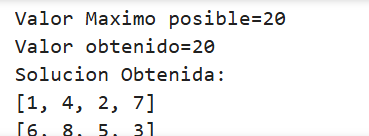

In [ ]:
ocho=ProblemaGeneticoOchoConsecutivos(lista_a_matriz,fun_mutar_par,fun_cruzarPMX,fun_fitness_Ocho_Cons)
salida=algoritmo_genetico(ocho,2,max,5,10,cruza_padres_destructiva,0.7,0.1)
print(f"Valor Maximo posible=20\nValor obtenido={salida[1]}\nSolucion Obtenida:\n{salida[0][0]}\n{salida[0][1]}")

Puedes estudiar el rendimiento del algoritmo para distintos parámetros y para tamaños más grandes de tableros.
